In [1]:
import os 
import numpy as np 
import pandas as pd 

import tensorflow as tf 
import tensorflow.keras as keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from keras.applications import ResNet50


%matplotlib inline

2024-04-17 16:15:15.665807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 16:15:15.665909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 16:15:15.831553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
file_path ='/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals'

for dirname, _ , FileName in os.walk(file_path):
    print(dirname)


/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/dogs
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/panda
/kaggle/input/animal-image-datasetdog-cat-and-panda/animals/animals/cats


In [3]:
print('Number of Cat Images',len(os.listdir(file_path+ '/cats')))
print('Number of Cat Images',len(os.listdir(file_path+ '/dogs')))
print('Number of Cat Images',len(os.listdir(file_path+ '/panda')))

Number of Cat Images 1000
Number of Cat Images 1000
Number of Cat Images 1000


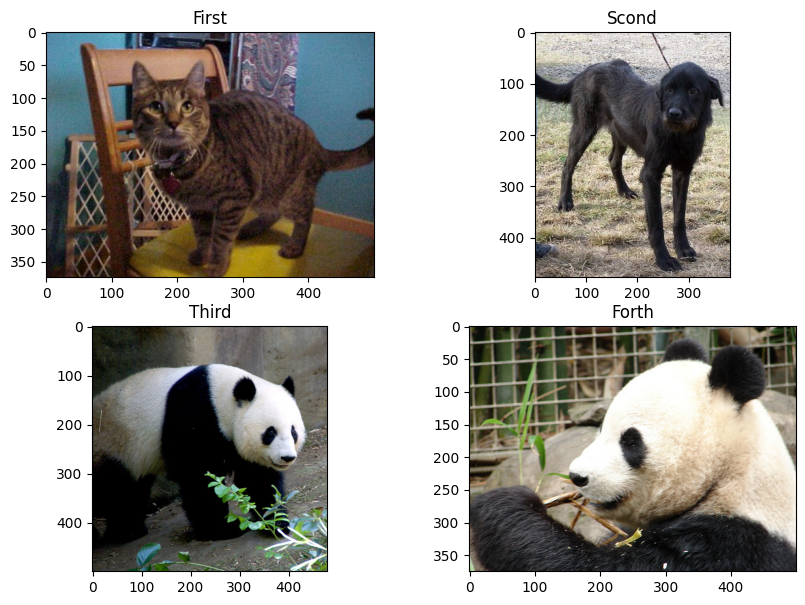

In [4]:
fig = plt.figure(figsize = (10,7))

rows = 2 
cols = 2 

img1 = image.load_img(file_path +'/cats/cats_00001.jpg')
img2 = image.load_img(file_path + '/dogs/dogs_00001.jpg')
img3 = image.load_img(file_path + '/panda/panda_00001.jpg')
img4 = image.load_img(file_path + '/panda/panda_00002.jpg')


fig.add_subplot(rows, cols,1 )
plt.imshow(img1)
plt.title('First')

fig.add_subplot(rows, cols,2 )
plt.imshow(img2)
plt.title('Scond')

fig.add_subplot(rows, cols,3 )
plt.imshow(img3)
plt.title('Third')

fig.add_subplot(rows, cols,4 )
plt.imshow(img4)
plt.title('Forth')
plt.show()

In [5]:
train_datagen = ImageDataGenerator(fill_mode = 'nearest', 
                                   validation_split = 0.2)

In [6]:
train_generator =train_datagen.flow_from_directory(
file_path, 
target_size = (108, 108), 
    class_mode = 'categorical', 
    color_mode = 'rgb',
    subset = 'training'
)


validation_generator = train_datagen.flow_from_directory(
file_path,
target_size = (108, 108), 
class_mode= 'categorical',
color_mode ='rgb',
subset= 'validation')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [7]:
model = keras.models.Sequential([
    ResNet50(input_shape = (108, 108, 3), include_top = False)
])

for layer in model.layers:
    layer.trainable = False
    
    
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation ='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
model.compile(loss =tf.losses.categorical_crossentropy, optimizer = 'Adam'
             , metrics =['accuracy'])

In [ ]:
hist = model.fit(train_generator, validation_data = validation_generator, 
                epochs = 25 )

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/75 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4609 - loss: 4.6550  

I0000 00:00:1713370550.794980     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 331ms/step - accuracy: 0.6828 - loss: 2.0957 - val_accuracy: 0.8717 - val_loss: 0.3588
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.8850 - loss: 0.3575 - val_accuracy: 0.9000 - val_loss: 0.3211
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9317 - loss: 0.1850 - val_accuracy: 0.9033 - val_loss: 0.2699
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9533 - loss: 0.1439 - val_accuracy: 0.8900 - val_loss: 0.3157
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9629 - loss: 0.1138 - val_accuracy: 0.8883 - val_loss: 0.3763
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9734 - loss: 0.0830 - val_accuracy: 0.9133 - val_loss: 0.3239
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.9698 - loss: 0.0805 - val_accuracy: 0.8983 - val_loss: 0.4405
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9824 - loss: 0.0421 - val_accuracy: 0.9083 - val

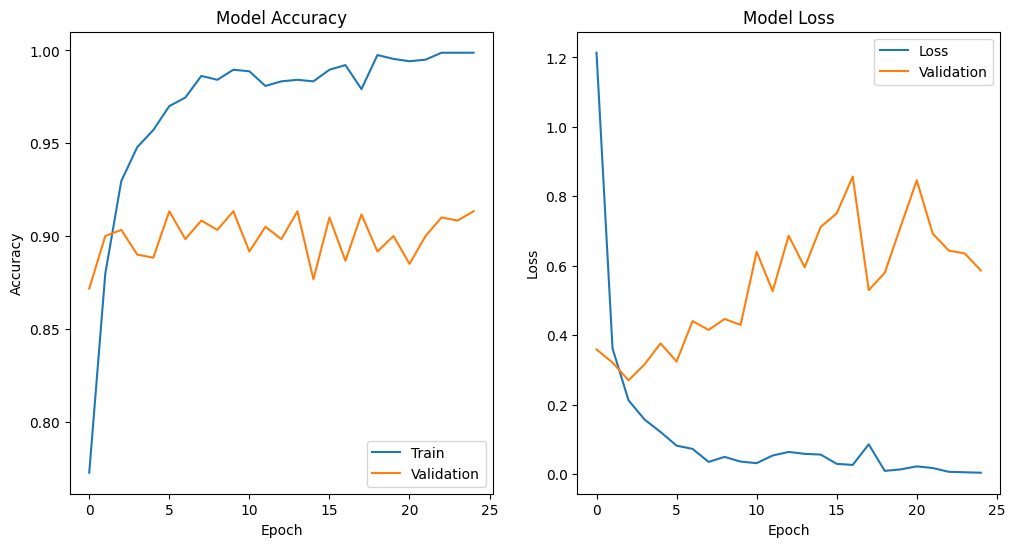

In [12]:
plt.figure(figsize =(12,6))

plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])


plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation'])

plt.show()